# ヒストグラム

In [1]:
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset1 = randn(100)

(array([  4.,   3.,  11.,  12.,  20.,  21.,  15.,   7.,   5.,   2.]),
 array([-2.47029321, -1.9357435 , -1.40119378, -0.86664407, -0.33209436,
         0.20245536,  0.73700507,  1.27155478,  1.80610449,  2.34065421,
         2.87520392]),
 <a list of 10 Patch objects>)

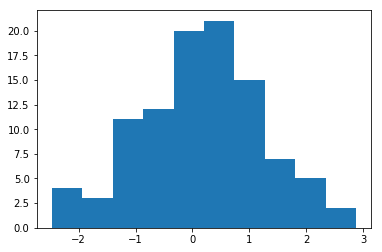

In [4]:
plt.hist(dataset1)

In [5]:
dataset2 = randn(80)

(array([  3.,   2.,   7.,  12.,  10.,  24.,  12.,   5.,   4.,   1.]),
 array([-2.72859612, -2.19821119, -1.66782626, -1.13744133, -0.60705639,
        -0.07667146,  0.45371347,  0.98409841,  1.51448334,  2.04486827,
         2.5752532 ]),
 <a list of 10 Patch objects>)

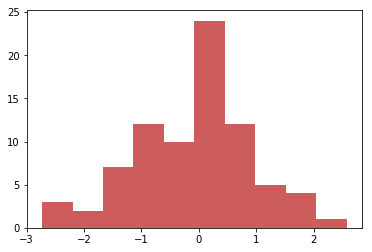

In [6]:
plt.hist(dataset2, color='indianred')

(array([ 0.07482934,  0.056122  ,  0.20578067,  0.22448801,  0.37414668,
         0.39285401,  0.28061001,  0.13095134,  0.09353667,  0.03741467]),
 array([-2.47029321, -1.9357435 , -1.40119378, -0.86664407, -0.33209436,
         0.20245536,  0.73700507,  1.27155478,  1.80610449,  2.34065421,
         2.87520392]),
 <a list of 10 Patch objects>)

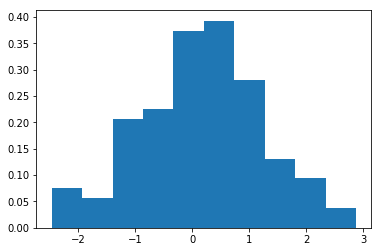

In [7]:
plt.hist(dataset1, normed=True)

(array([ 0.04713558,  0.09427115,  0.09427115,  0.        ,  0.14140673,
         0.18854231,  0.18854231,  0.37708462,  0.14140673,  0.32994904,
         0.75416924,  0.37708462,  0.28281346,  0.28281346,  0.04713558,
         0.18854231,  0.09427115,  0.09427115,  0.        ,  0.04713558]),
 array([-2.72859612, -2.46340366, -2.19821119, -1.93301873, -1.66782626,
        -1.40263379, -1.13744133, -0.87224886, -0.60705639, -0.34186393,
        -0.07667146,  0.18852101,  0.45371347,  0.71890594,  0.98409841,
         1.24929087,  1.51448334,  1.77967581,  2.04486827,  2.31006074,
         2.5752532 ]),
 <a list of 20 Patch objects>)

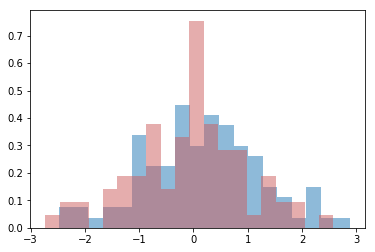

In [9]:
plt.hist(dataset1, normed=True, alpha=0.5, bins=20)
plt.hist(dataset2, normed=True, alpha=0.5, bins=20, color='indianred')

In [10]:
data1 = randn(1000)
data2 = randn(1000)

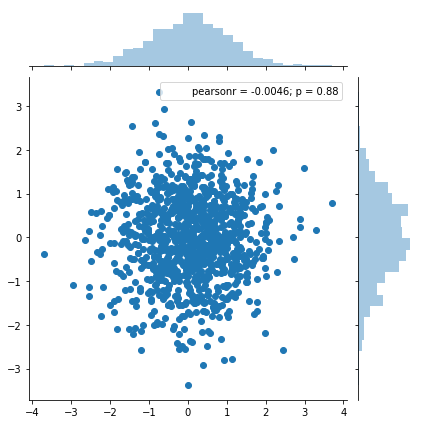

In [11]:
sns.jointplot(data1, data2)

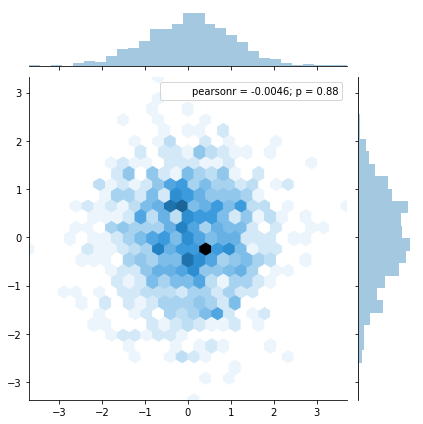

In [12]:
sns.jointplot(data1, data2, kind='hex')

# カーネル密度推定

In [14]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
dataset = randn(25)

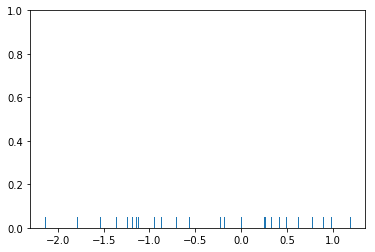

In [18]:
sns.rugplot(dataset)

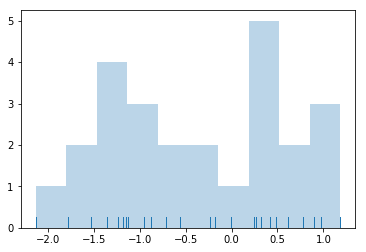

In [19]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

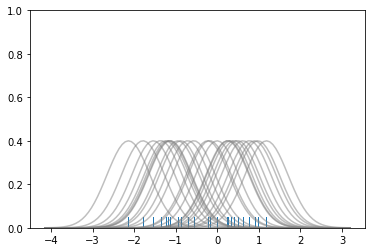

In [23]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0, 1)


Text(0.5,0.98,'Sum of the Basic Functions')

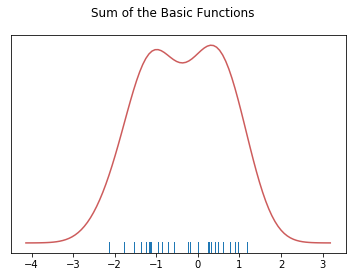

In [24]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basic Functions')

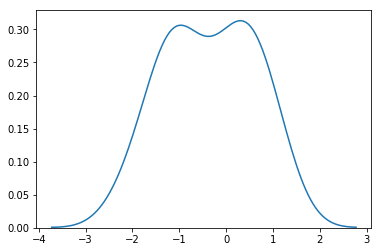

In [25]:
sns.kdeplot(dataset)

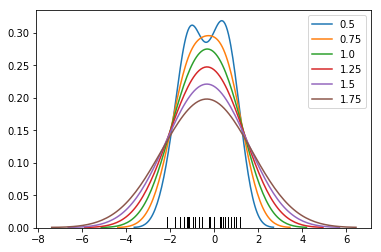

In [26]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

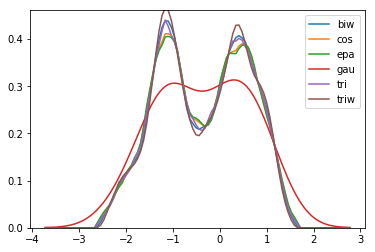

In [28]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

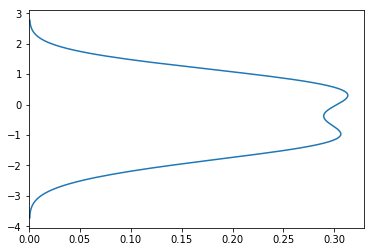

In [29]:
sns.kdeplot(dataset, vertical=True)

## 累積分布関数

(array([  1.,   3.,   7.,  10.,  12.,  14.,  15.,  20.,  22.,  25.]),
 array([-2.13646305, -1.80445589, -1.47244873, -1.14044157, -0.80843442,
        -0.47642726, -0.1444201 ,  0.18758706,  0.51959421,  0.85160137,
         1.18360853]),
 <a list of 10 Patch objects>)

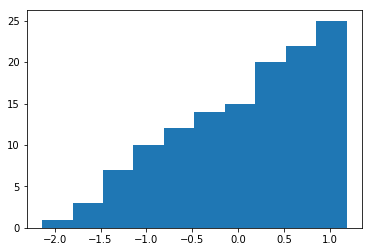

In [32]:
plt.hist(dataset, cumulative=True)

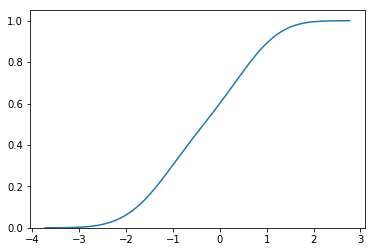

In [33]:
sns.kdeplot(dataset, cumulative=True)

In [34]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

/Users/akihiro/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


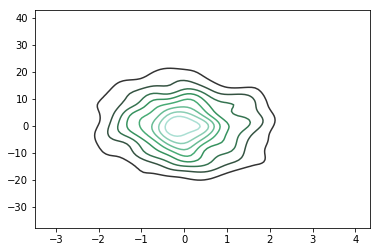

In [35]:
df = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(df)

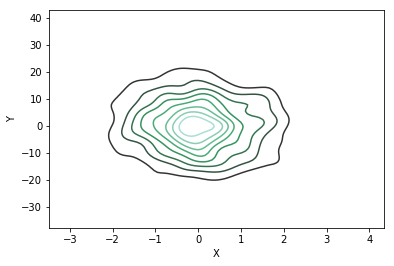

In [37]:
sns.kdeplot(df.X, df.Y)

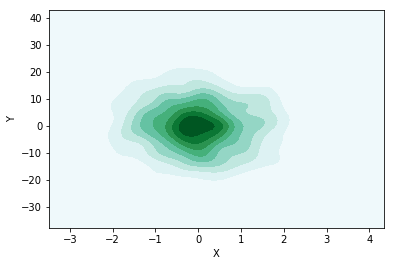

In [38]:
sns.kdeplot(df.X, df.Y, shade=True)

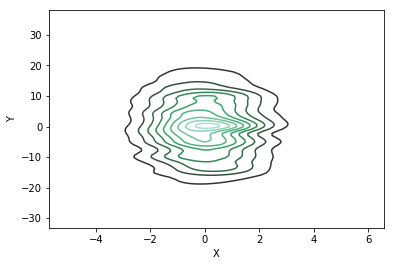

In [39]:
sns.kdeplot(df.X, df.Y, bw=1)

/Users/akihiro/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


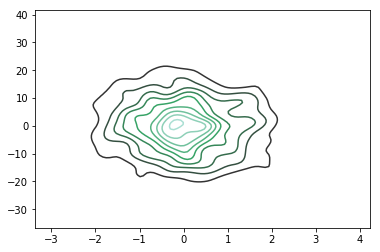

In [40]:
sns.kdeplot(df, bw='silverman')

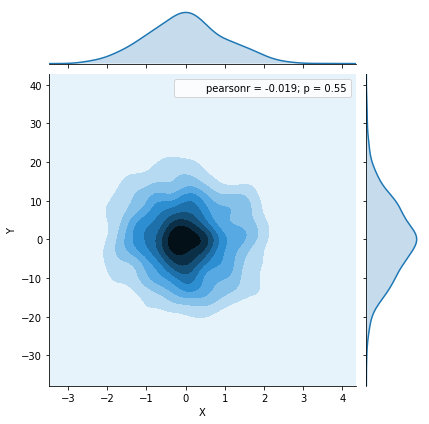

In [43]:
sns.jointplot('X', 'Y', df, kind='kde')

# 分布の可視化

In [44]:
from numpy.random import randn
import seaborn as sns

%matplotlib inline

In [45]:
dataset = randn(100)

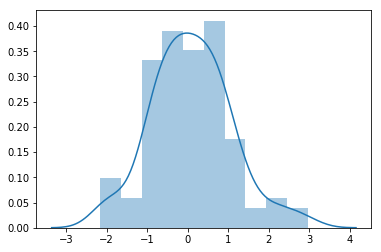

In [46]:
sns.distplot(dataset)

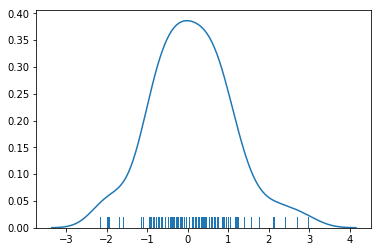

In [47]:
sns.distplot(dataset, rug=True, hist=False)

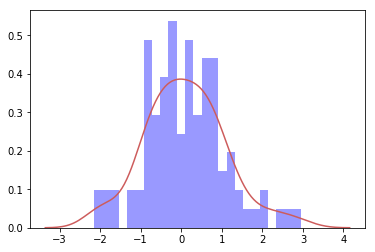

In [50]:
sns.distplot(dataset, bins=25, kde_kws={'color': 'indianred'}, hist_kws={'color': 'blue'})

In [51]:
from pandas import Series

In [52]:
ser1 = Series(dataset, name='My_Data')

In [53]:
ser1

0    -0.790002
1     0.399809
2    -0.492293
3     1.236415
4     2.135770
5     0.282126
6     0.039592
7     0.744624
8    -2.158102
9    -0.638224
10   -0.708822
11   -0.233334
12   -1.587113
13   -0.417758
14    1.041457
15   -1.140681
16    0.899781
17    0.654512
18    0.191252
19    0.667940
20   -0.154963
21    0.345349
22    0.514606
23   -0.913275
24   -0.924902
25   -1.148337
26    0.873591
27   -0.915080
28   -0.435337
29    0.569383
        ...   
70    0.196871
71    1.190502
72    0.460910
73   -0.669977
74    0.855896
75   -0.640738
76    0.518313
77    1.387296
78   -0.793070
79    0.934125
80   -0.342808
81    0.590793
82   -0.167419
83    2.389576
84   -0.848750
85   -0.091061
86    0.169599
87   -1.991894
88   -0.273528
89    0.261668
90    2.099819
91   -0.299511
92   -0.743236
93   -1.112763
94    1.160514
95    0.712856
96    0.289006
97    0.291655
98   -0.927124
99   -0.193670
Name: My_Data, Length: 100, dtype: float64

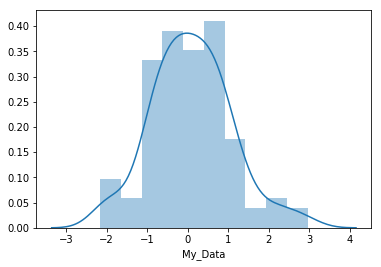

In [54]:
sns.distplot(ser1)